# HW 9 - Random Stuff


### Name:   Jake Richter



---


**Problem 1: Rejection Method**

Use the rejection method to generate a sequence of random numbers distributed according to $P_y(y) = \alpha e^{-\beta y}$.  Make a 10-bin histogram of the resulting distribution for $N=1000$ draws from the distribution, and a 100-bin histogram of the resulting distribution for $N=10^6$ draws from the distribution.  Plot the analytical curve over both. Here's a simple code to demonstrate how to plot a histogram:

    import matplotlib.pyplot as plt
    import numpy as np
    x = np.random.randn(500)
    width = 0.5
    histmin = np.floor(min(x))
    histmax = np.ceil(max(x))+width
    bins = np.arange(histmin,histmax,width)
    plt.hist(x,bins=bins)
    plt.show()


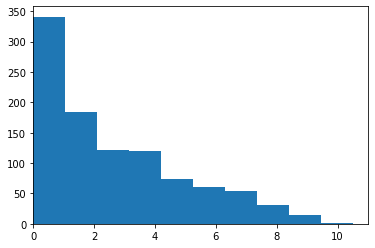

In [199]:
import numpy as np 
import matplotlib.pyplot as plt 
def ProbFunction(x):
    return 10*np.exp(-30*x)
def Rejection(Npoints, DensityFunction, binNumber):
    i = 1 
    yl = []

    # Full Rejection method
    while i <= Npoints:
        x = np.random.uniform(low = 0, high = 10)
        y = np.random.uniform(low = 0, high = 10)
        # Rejecting the samples that don't meet the criteria
        if y <= DensityFunction(x):
            yl.append(y)
            i +=1
        else:
            continue
    # Creating the Histogram artist 
    width = 0.5
    histmin = np.floor(min(yl))
    histmax = np.ceil(max(yl))+width
    
    bins = np.linspace(histmin,histmax,binNumber)
    histArtist = plt.hist(yl,bins=bins)
    return histArtist
x1 = np.linspace(-5,5,100)
y1 = ProbFunction(x1)

plt.figure()
Rejection(1000, ProbFunction, 11)
#plt.plot(x1,y1)
plt.xlim(0,11)
plt.show()


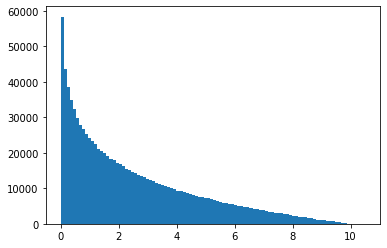

In [200]:
# Part 2 - with 100 bins
plt.figure()
Rejection(1000000, ProbFunction, 101)
plt.show()

---
**Problem 2: Hypersphere volume**

Newman problem 10.7, but give volumes for spheres of 'radius = 1' and dimensionality 1-10 (e.g., for 1D, 'V' = 2, for 2D, V = $\pi$ (area), etc.)

In [31]:
import numpy as np 

ListofVolumes = []
Npoints = 1000000

for n in np.arange(1, 11):
    count = 0.0 
    

    for i in range(Npoints):
        xs = np.random.uniform(low = -1.0, high = 1.0, size = n)
        SumToCheck = np.sum(np.square(xs))
        if SumToCheck <= 1 :
            count += 1
        else:
            
            continue
    Volume = (2**n)*count/(Npoints)
    ListofVolumes.append(str(np.around(Volume/np.pi,2)) + '\u03C0')

print(ListofVolumes)

['0.64π', '1.0π', '1.33π', '1.57π', '1.67π', '1.64π', '1.51π', '1.29π', '1.05π', '0.82π']


---
**Problem 3: Random Walk in 2D**

Simulate a random walk in 2D for $N_{\rm walkers}$ each stepping $N_{\rm steps}$.   Start all walkers at the origin of your coordinate system, and plot the positions of all particles at 5 times sampled from your steps (0, $N_{\rm steps}/4$, $N_{\rm steps}/2$ $N_{\rm steps}*3/4$, $N_{\rm steps}-1$).

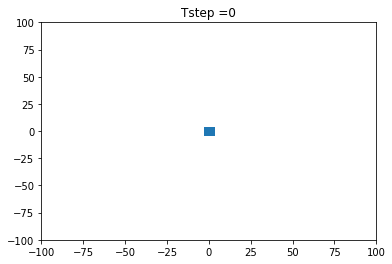

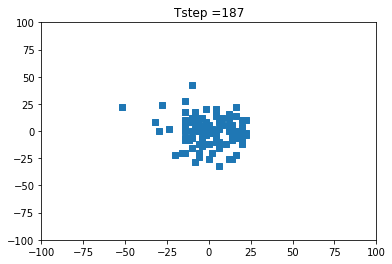

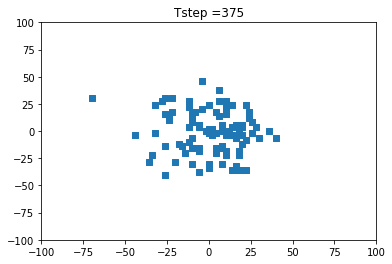

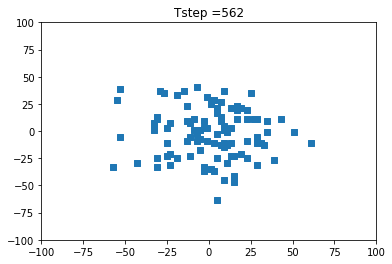

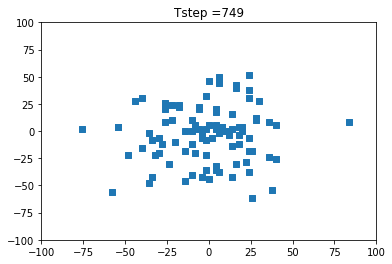

In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 

Nwalkers = 100
Nsteps = 750
x = np.zeros(Nwalkers)
y = np.zeros(Nwalkers)
r = np.array([x,y])
r = r.T




ScatterArtists = []


for t in range(Nsteps):
    for walker in range(Nwalkers):
        xrand = np.random.uniform(low = 0.0, high = 1.0, size = 1)
        yrand = np.random.uniform(low = 0.0, high = 1.0, size = 1)
        
        if xrand <= .5 :
            r[walker, 0] += 1.0 
        else:
            r[walker,0] -= 1.0 


        if yrand <= .5 :
            r[walker, 1] += 1.0
        else:
            r[walker, 1] -= 1.0  
    # Creating the Scatterplot artists
    if t == 0.0 or t == int(.25*Nsteps) or t == .50*Nsteps or t==int(.75*Nsteps) or t== int(Nsteps -1 ) :
        plt.figure()
        plt.scatter(r[:,0],r[:,1], marker = 's')
        plt.title('Tstep ='+str(t))
        plt.xlim(-100,100)
        plt.ylim(-100,100)
        
        
        

# WalkerAnimation = animation.ArtistAnimation(fig, ScatterArtists, interval = 1000, blit = True )
plt.show()

---
**Problem 4: Entropy**

Extend Problem 3 to now calculate the entropy of the distribution as a function of time, as we discussed in class.  Here, you should plot only the final particle distribution and the entropy curve at the end of the calculation.  You may stop your time stepping when your first particle reaches the boundary of your calculation domain.  I suggest you use either 9 or 25 ancillary grid cells.

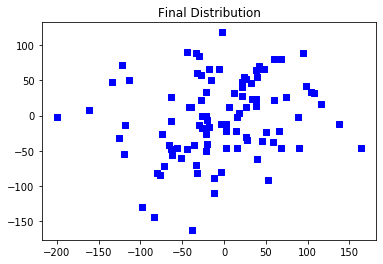

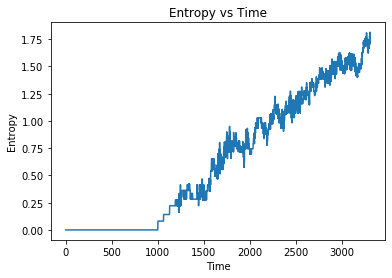

In [201]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] ='C:\\Users\\jakri\\Programs\\Python\\Python38\\Lib\\site-packages\\ffmpeg\\ffmpeg-20200403-52523b6-win64-static\\bin\\ffmpeg.exe'


# Initial Parameters 
Nwalkers = 100
Nsteps = 50000
x = np.zeros(Nwalkers)
y = np.zeros(Nwalkers)
r = np.array([x,y])
r = r.T

# For cell creation
xmin = ymin = - 200
xmax = ymax = 200
nx = 5
ny = 5 
Cells = np.zeros(nx*ny)
# Intial Entropy 
Sentropy = np.zeros(Nsteps)
# Animation Set up 
#fig = plt.figure()

#ax = plt.axes(xlim = (xmin,xmax), ylim = (ymin,ymax))
#ScatterArtists = [] # Lists for Scatter Artists 




# Main Walking Nested For loop
for t in range(Nsteps):
    Cells = np.zeros(nx*ny)
    
    for walker in range(Nwalkers):
        xrand = np.random.uniform(low = -1.0, high = 1.0, size = 1)
        yrand = np.random.uniform(low = -1.0, high = 1.0, size = 1)
        
        
        if xrand >= 0 :
            r[walker, 0] += 1.0 
            
            
        elif xrand < 0 :
            r[walker,0] -= 1.0 

        
        if yrand >= 0 :
            r[walker, 1] += 1.0
        else:
            r[walker, 1] -= 1.0
        

        
        

        # Determining cell counts 
        ix = int(r[walker,0]/(xmax - xmin)*nx)
        iy = int(r[walker,1]/(ymax - ymin)*ny)
        cell = ix + iy*ny
        Cells[cell] += 1.0 

    # Calculating Entropy 
    for k in range(len(Cells)):
        Pk = Cells[k]/Nwalkers
        if Pk > 0 :
            Sentropy[t] += -Pk * np.log2(Pk)
    
    # Breaking when the first one makes it to a bound
    if np.max(r[:, 0]) >= xmax or np.min(r[:,0]) <= xmin or np.max(r[:, 1]) >= ymax or np.min(r[:,1]) <= ymin:
                
        break  
    
    
    
   









plt.figure()
plt.scatter(r[:,0],r[:,1], marker = 's', c = 'b')
plt.title('Final Distribution')

plt.figure()
plt.plot(np.arange(t),Sentropy[0:t])
plt.title('Entropy vs Time')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.show()

---
**Problem 5: Entropy 2**

Modify the code from Problem 3 so that particles cannot leave the computational domain.  For example, if a particle tries to step left past index $ix =0$ force it to step right instead, and similarly for the other boundaries.  Run the calculation until the entropy versus time curve flattens out.  Plot the final particle distribution and the entropy curve.

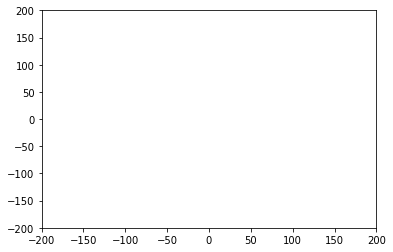

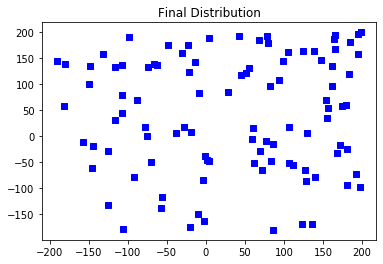

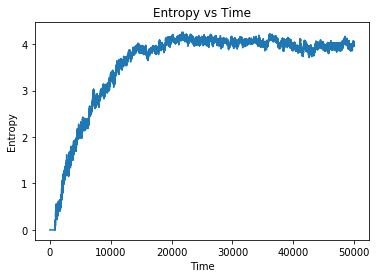

In [202]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] ='C:\\Users\\jakri\\Programs\\Python\\Python38\\Lib\\site-packages\\ffmpeg\\ffmpeg-20200403-52523b6-win64-static\\bin\\ffmpeg.exe'


# Initial Parameters 
Nwalkers = 100
Nsteps = 50000
x = np.zeros(Nwalkers)
y = np.zeros(Nwalkers)
r = np.array([x,y])
r = r.T

# For cell creation
xmin = ymin = - 200
xmax = ymax = 200
nx = 5
ny = 5 
Cells = np.zeros(nx*ny)
# Intial Entropy 
Sentropy = np.zeros(Nsteps)
# Animation Set up 
fig = plt.figure()

ax = plt.axes(xlim = (xmin,xmax), ylim = (ymin,ymax))
ScatterArtists = [] # Lists for Scatter Artists 




# Main Walking Nested For loop
for t in range(Nsteps):
    Cells = np.zeros(nx*ny)
    
    for walker in range(Nwalkers):
        xrand = np.random.uniform(low = -1.0, high = 1.0, size = 1)
        yrand = np.random.uniform(low = -1.0, high = 1.0, size = 1)
        
        
        if xrand >= 0 :
            r[walker, 0] += 1.0 
            
            
        elif xrand < 0 :
            r[walker,0] -= 1.0 

        
        if yrand >= 0 :
            r[walker, 1] += 1.0
        elif yrand < 0:
            r[walker, 1] -= 1.0
        

        # Testing bounds and changing direction
        if r[walker,0] < xmin:
            r[walker,1] += 1
            r[walker,0] +=1
    
        if r[walker,0] >= xmax:
            r[walker,1] += 1
            r[walker,0] -=1
        
        if r[walker,1] <= ymin:
            r[walker,0] += 1
            r[walker,1] +=1
        
        if r[walker,1] >= ymax:
            r[walker,0] += 1
            r[walker,1] -= 1
        
        # Checking Corners
        if r[walker,1] >= ymax and r[walker,0] >= xmax:
            r[walker,0] -= 1
            r[walker,1]-=1
        if r[walker,1] >= ymax and r[walker,0] <= xmin:
            r[walker,1] -=1
            r[walker,0] +=1
        if r[walker,1] <=ymin and r[walker,0] >= xmax:
            r[walker,1] += 1
            r[walker,0] -= 1
        if r[walker,1] <= ymin and r[walker,0] <= xmin:
            r[walker,0] +=1
            r[walker,1] +=1 

        
        

        # Determining cell counts 
        ix = int(r[walker,0]/(xmax - xmin)*nx)
        iy = int(r[walker,1]/(ymax - ymin)*ny)
        cell = ix + iy*ny
        Cells[cell] += 1.0 

    # Calculating Entropy 
    for k in range(len(Cells)):
        Pk = Cells[k]/Nwalkers
        if Pk > 0 :
            Sentropy[t] += -Pk * np.log2(Pk)
    
   
    
    # Creating the Scatterplot artists every 2 time steps
    
    #scatter = ax.scatter(r[:,0],r[:,1], marker = 's', c = 'b')
    #annotatedEntropy = plt.annotate('Entropy = '+ str(np.around(Sentropy[t],5)), xy = (-150, 150), xytext = (-150,150))
    #ScatterArtists.append([scatter, annotatedEntropy] )




#FFwriter = animation.FFMpegWriter(fps = 30)


# WalkerAnimation2 = animation.ArtistAnimation(fig, ScatterArtists, interval = 50, blit = True )
#plt.show()
# WalkerAnimation2.save('HW10_Problem4.mp4', writer = FFwriter)

plt.figure()
plt.scatter(r[:,0],r[:,1], marker = 's', c = 'b')
plt.title('Final Distribution')

plt.figure()
plt.plot(np.arange(t),Sentropy[0:t])
plt.title('Entropy vs Time')
plt.xlabel('Time')
plt.ylabel('Entropy')

plt.show()

---
**Problem 6: Random Walk in 3D**

Simulate a random walk in 3D allowing the walker to make steps of unit length in random directions - don't restrict the walkers to sites on a discrete lattice.  Show that the motion is diffusive, that is $<r^2> = Dt$.  Find the value of $D$.  Note that to get a uniform distribution of angles, you will actually want to draw 3 values of $x$, $y$, and $z$, and then renormalize so the length of the displacement vector is 1.0.   Think about and explain why you cannot simply draw from random distributions of $(1.0,\theta,\phi)$ and get a uniform distribution of directions.

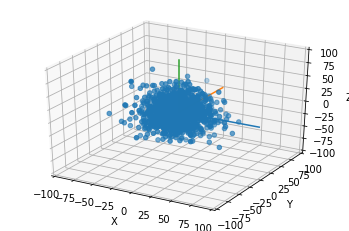

In [207]:
'''
Create a Random 3D walker 

'''
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D 
plt.rcParams['animation.ffmpeg_path'] ='C:\\Users\\jakri\\Programs\\Python\\Python38\\Lib\\site-packages\\ffmpeg\\ffmpeg-20200403-52523b6-win64-static\\bin\\ffmpeg.exe'


# Initial Parameters 
Nwalkers = 1000
Nsteps = 8000
x = np.zeros(Nwalkers)
y = np.zeros(Nwalkers)
z = np.zeros(Nwalkers)

r = np.array([x,y,z])
r = r.T

xmax = ymax = zmax = 100
xmin = ymin = zmin = -100
rcor = []

for t in range(Nsteps):
    
    
    for walker in range(Nwalkers):
        xrand = np.random.uniform(low = -2.0, high = 2.0)
        yrand = np.random.uniform(low = -2.0, high = 2.0)
        zrand = np.random.uniform(low = -2.0, high = 2.0)
        
        

        
        # Creating the Displacement vector 
        displVec = np.array([xrand, yrand, zrand], dtype = float)
        # Normalizing it 
        displVec *= 1/np.sum(np.square(displVec))

        # adding the normalized displacement vector to our position coordinate
        r[walker,:] += displVec

    
    
    rsquared = np.sqrt(r[:,0]**2 + r[:,1]**2 + r[:,2]**2)
    ravg = np.sum(rsquared)/len(rsquared)
    rcor.append(ravg**2)
    
    
    if np.max(r[:, 0]) >= xmax or np.min(r[:,0]) <= xmin or np.max(r[:, 1]) >= ymax or np.min(r[:,1]) <= ymin or np.max(r[:, 2]) >= xmax or np.min(r[:,2]) <= xmin :
        break
    
    

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs = r[:,0], ys = r[:,1], zs = r[:,2])

# creating the orthogonal grid

ax.plot(xs = (xmax, 0, 0), ys = (0,0,0), zs = (0,0,0))
ax.plot(xs = (0, 0, 0), ys = (ymax,0,0), zs = (0,0,0))
ax.plot(xs = (0, 0, 0), ys = (0,0,0), zs = (zmax,0,0))


ax.set_xlim(-100,100)
ax.set_xlabel('X')

ax.set_ylim(-100,100)
ax.set_ylabel('Y')

ax.set_zlim(-100,100)
ax.set_zlabel('Z')

plt.show()      


        
        

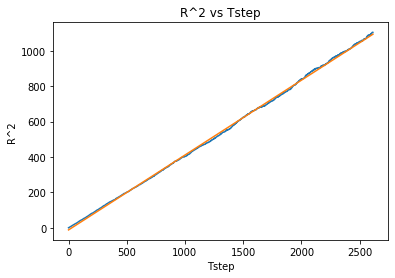

D = 0.4224003200427033


In [208]:
# Expectation of R^2

d, ycept = np.polyfit(np.arange(t+1),rcor,1)
newX = np.linspace(0,t,200)

plt.figure()

plt.plot(np.arange(0,t+1), rcor)
plt.plot(newX, d*newX + ycept)
plt.title('R^2 vs Tstep')
plt.ylabel('R^2')
plt.xlabel('Tstep')

plt.show()

print('D =',d)


---
**Problem 7: Diffusion Limited Aggregation**

Write a code that simulates diffusion limited aggregation in 2D, as discussed in class, and prints out the dimmensionality of the resulting cluster.  Plot the final state of the cluster.  As discussed in class, put a seed particle in you computational domain.  Start particles on a circle of radius $R_{\rm start}$ that is $\sim$3-5 units bigger than the cluster size.  If a particle wanders out past 1.5 $R_{\rm start}$, kill it and restart a new random particle on the circle.  

For calculating the radius of the cluster a useful NumPy routine is "nonzero()" which returns the indices of the array that store values that are not zero.  So for example

    x,y = np.nonzero(c)

returns the $x,y$ arrays of non-zero elements in array $c$.  You can then use these to calculate $r_{\rm max}$, and then add 3-5 to get $R_{\rm start}$.

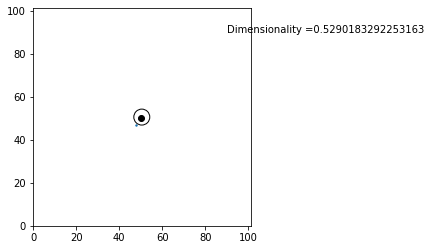

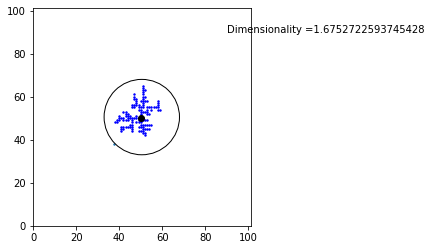

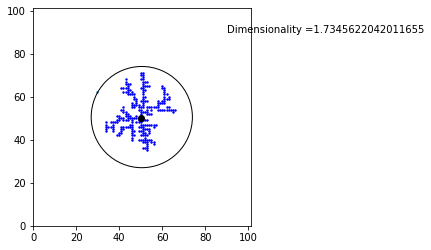

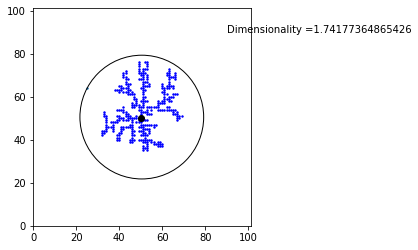

Dimension =  1.6585577275451198


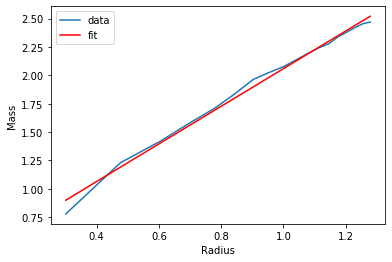

In [206]:
import numpy as np 
import matplotlib.pyplot as plt 

# The number of grid points we want to plot on 
gridPoints = 101

def draw_cricle(r):
    SurroundingCircle = plt.Circle((gridPoints/2,gridPoints/2), r, fill = False, color = 'b')
    return SurroundingCircle


def cluster_size(clust):
    x,y = np.nonzero(clust)
    r = np.sqrt((x - gridPoints/2)**2 + (y - gridPoints/2)**2)
    return np.max(r) + 3

def ctest(x,y,c):
    if c[x,y]==1:
        return True
    if c[x+1,y]==1 or c[x-1,y]==1 or c[x,y-1]==1 or c[x,y+1]==1:
        return True

# Initializing Cluster
cluster = np.zeros([gridPoints,gridPoints], dtype = int)
cluster[gridPoints//2,gridPoints//2] = 1 

# How many walkers and how many steps each walker takes
Attempts = 751
WalkerSteps = 500

# Initializing random walker 
rw = np.zeros([1,2])
# Creating/Intializing a temporary r and m value calculate the dimensions
nr = 0.0 
nm = 0.0 
r = 0.0 
Dimension = 1.0



# Main walker loop

for i in range(Attempts):
    
    # Calculating the radius 
    r = cluster_size(cluster)
    
    
    

    

    # Initial random number on circle
    theta = np.random.randint(low = 0, high = 360*3)*np.pi/180
    xi = r*np.cos(theta) + gridPoints//2
    yi = r*np.sin(theta) + gridPoints//2
    
    # Setting initial elements of the walker to be elements
    rw[0:,] = [int(xi),int(yi)]

    for l in range(WalkerSteps):
        # Creating a random step
        xstep = np.random.uniform(low = -1, high = 1)
        ystep = np.random.uniform(low = -1, high= 1)
        
        # Moving the random walker based on the value of the random steps
        if xstep > .5 :
            rw[0,0] += 1.0 
        elif xstep < -.5 :
            rw[0,0] -= 1.0 


        elif xstep > 0 :
            rw[0,1] += 1.0
        else:
            rw[0,1] -= 1.0  
        
        # Ensuring that the random walker is using integers
        rw[0,0] = int(rw[0,0])
        rw[0,1] = int(rw[0,1])
        
        # Creating a distance variable to test how far past the original radius it has gone 
        dist = np.sqrt((rw[0,0] - (gridPoints/2))**2 + (rw[0,1]-(gridPoints/2))**2)
        if dist/r  > 1.5 :
            break
        
        # Testing whether the random walker has 'ran' into the cluster 
        if ctest(int(rw[0,0]), int(rw[0,1]), cluster) == True:
            r = cluster_size(cluster)

            cluster[int(rw[0,0]),int(rw[0,1])] = 1
            
            nr = cluster_size(cluster) 
            deltaR = nr - r 
        
            
            # Temprorary array to calculate the mass
            xtempor, ytempor = np.nonzero(cluster)
    
            # Calculating mass and change in mass
            m = len(ytempor)
            deltaM = m - nm
            nm = m  
            Dimension = deltaR/deltaM
            
             
            break
        
    # Making a plots every 250 iterations
    if i%250 == 0.0:
        
        # Creating the figure -
        fig,ax = plt.subplots()
        xp, yp = np.nonzero(cluster)
        ax.set_aspect('equal')
        
        # making the artists - This one is for the cluster
        plt.scatter(xp, yp, color = 'b', s = 2.0)
        
        # Artist for the random walker's starting point on the circle 
        plt.scatter((r*np.cos(theta)+50), ((r*np.sin(theta)+50)), s = 2.0)
        
        # Artist for the (original) cener of the cluster 
        plt.scatter((50),(50), color = 'k')
        
        # Defining the axis for the plot
        plt.axis([0,gridPoints,0,gridPoints])
        
        
        
        # Artist for the cirlcle - appending it to the axis
        Circ = plt.Circle((gridPoints/2, gridPoints/2), r, fill = False)
        ax.add_artist(Circ)
        
        # Calculating dimension for that time step 
        dimT = np.log10(len(xp))/np.log10(r)
        # Annotating artists to indicate dimensionality on that time step 
        plt.annotate('Dimensionality =' + str(dimT), xy = (90,90), xytext = (90,90))
        

    rw[0:,] = 0.0 
    

   
plt.show()

# From Eden Cluster Code that was sent  - getting the Dimensions from bulk data/Making the plot

ry, rx = np.mgrid[0:gridPoints,0:gridPoints]

ry = ry-(gridPoints/2)
rx = rx-(gridPoints/2)


rp = np.sqrt(ry**2 + rx**2)


rc = rp*cluster


rad = np.arange(2,int(r*.7))
m_r = []
for i in range(2,int(r*.7)):
    a = rc[rc<i]
    m_r.append(len(a[a>0]))


logr = np.log10(rad)
logm = np.log10(m_r)
plt.xlabel('Radius')
plt.ylabel('Mass')
plt.plot(logr,logm,label='data')
m, b = np.polyfit(logr,logm,1)

xfit = np.linspace(min(logr),max(logr),100)
yfit = m*xfit + b

plt.plot(xfit,yfit,'r-',label='fit')

print("Dimension = ",m)

plt.legend(loc=2)
plt.show()

---
**Problem 8: DLA 2**
Write a code that generates a DLA structure using an initial "seed" which is the entire $x$ axis, e.g.,

    c = np.zeros([n,n],dtype=int)
    c[:,0] = 1
    
Then you'll start your walkers on a line that is $\sim$ 3-5 units higher than the maximum occupied $y$ value.  The resulting structure has been used to model the paths followed by electric discharges in a gas (e.g., lightning bolts).

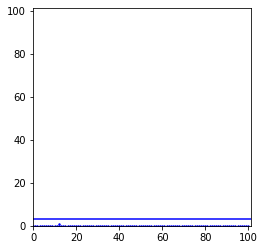

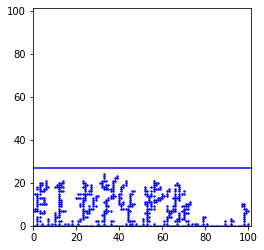

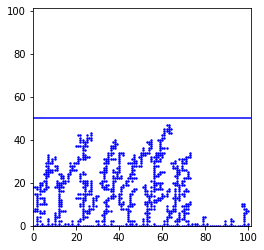

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 

gridPoints = 101

def draw_line(r):
    line = plt.plot([0,gridPoints],[r,r], color = 'b')
    return line,


def cluster_size(clust):
    x,y = np.nonzero(clust)
    r = np.max(y)
    return r + 3

def ctest(x,y,c):
    if c[x,y]==1:
        return True
    if c[x+1,y]==1 or c[x-1,y]==1 or c[x,y-1]==1 or c[x,y+1]==1:
        return True

# Initializing Cluster
cluster = np.zeros([gridPoints,gridPoints], dtype = int)
cluster[:,0] = 1 

Attempts = 1001
WalkerSteps = 50
# Initializing random walker 
rw = np.zeros([1,2])


# Main walker loop

for i in range(Attempts):
    r = cluster_size(cluster)
    # Initial random number on circle
    
    xi = np.random.randint(low = 0.0, high = gridPoints-15)
    yi = r
    rw[0:,] = [int(xi),int(yi)]

    for l in range(WalkerSteps):
        
        xstep = np.random.uniform(low = -1, high = 1)
        ystep = np.random.uniform(low = -1, high = 1)
        if xstep >= .5 :
            rw[0,0] += 1.0 
        elif xstep >= -.5:
            rw[0,0] -= 1.0 


        elif xstep >= 0 :
            rw[0,1] += 1.0
        else:
            rw[0,1] -= 1.0  
        
        

        rw[0,0] = int(rw[0,0])
        rw[0,1] = int(rw[0,1])
        int(rw[0,1])

        
        if int(rw[0,0]) > 99:
            continue 
        if ctest(int(rw[0,0]), int(rw[0,1]), cluster) == True:
            cluster[int(rw[0,0]),int(rw[0,1])] = 1
            break
               
        
    # Plotting Every 500 Iterations
    if i%500 == 0.0:
        
        
        fig,ax = plt.subplots()
        xp, yp = np.nonzero(cluster)
        ax.set_aspect('equal')
        draw_line(r)
        plt.scatter(xp, yp, color = 'b', s = 2.0)
        
       
        plt.axis([0,gridPoints,0,gridPoints])

    rw[0:,] = 0.0 
plt.show()
        

---
**Problem 9: Percolation**

Generate a spanning cluster for a two-demensional square lattice at $p = p_c$ using the code from the 'dragly' blog.  Estimate the fractal dimensionality of the cluster.  You should find a value of $d_f$ which is slightly smaller than 2 (the expected value is $\sim$1.9).

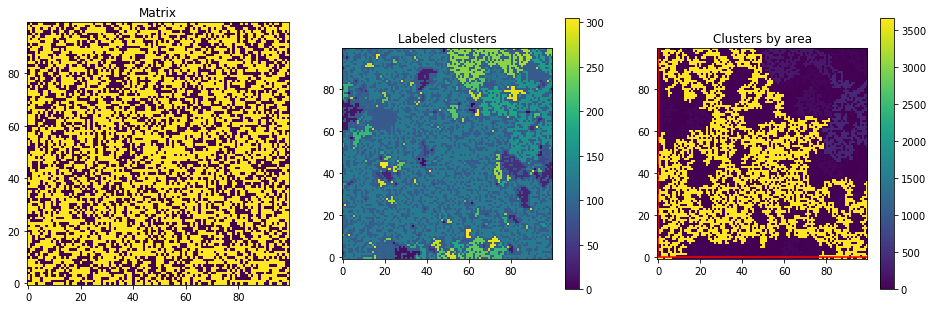

Dimension =  1.9273830607296112


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import measurements

# From the Dragly Site #
L = 100
r = np.random.rand(L,L)
p = 0.60 # This will give a percolation cluster that spans often - found this by testing with increments of .1
z = r<p

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.imshow(z, origin='lower', interpolation='nearest')
# plt.colorbar()
plt.title("Matrix")

# Show image of labeled clusters (shuffled)
lw, num = measurements.label(z)
plt.subplot(1,3,2)
b = np.arange(lw.max() + 1) # create an array of values from 0 to lw.max() + 1
np.random.shuffle(b) # shuffle this array
shuffledLw = b[lw] # replace all values with values from b
plt.imshow(shuffledLw, origin='lower', interpolation='nearest') # show image clusters as labeled by a shuffled lw
plt.colorbar()
plt.title("Labeled clusters")

# Calculate areas
plt.subplot(1,3,3)
area = measurements.sum(z, lw, index=np.arange(lw.max() + 1))
areaImg = area[lw]
im3 = plt.imshow(areaImg, origin='lower', interpolation='nearest')
plt.colorbar()
plt.title("Clusters by area")

# Bounding box
sliced = measurements.find_objects(areaImg == areaImg.max())
if(len(sliced) > 0):
    sliceX = sliced[0][1]
    sliceY = sliced[0][0]
    plotxlim = im3.axes.get_xlim()
    plotylim = im3.axes.get_ylim()
    plt.plot([sliceX.start, sliceX.start, sliceX.stop, sliceX.stop, sliceX.start],
                     [sliceY.start, sliceY.stop, sliceY.stop, sliceY.start, sliceY.start],
                     color="red")
    plt.xlim(plotxlim)
    plt.ylim(plotylim)

plt.show()

# Getting the radius by using the diagonal of the box as the radius
diameter = np.sqrt((sliceX.start - sliceX.stop)**2 + (sliceY.start - sliceY.stop)**2)
radius = (1/2)*diameter
ClusterArea = areaImg.max()

logB = np.log10(radius)
logA = np.log10(ClusterArea)
dimension = logA/logB
print('Dimension = ',dimension)